# **Simulation EuRoC 2024 (Stochastic Edition)**

Team: TU Wien Space Team (Nr. 22) \
Project: Lamarr \
Rocket: Hedy \


## Installs / Drive mount

In this section all needed libraries are installed and the needed classes imported

In [ ]:
!pip install "netCDF4<1.6.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.6 MB/s eta 0:00:00


In [ ]:
pip install rocketpy==1.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 698.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.2/296.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 30.4 MB/s eta 0:00:00
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65859 sha256=02c7c51c22896bcaa23e31aa8212ccd38770a134b46d07c17e23de7c6f01a9bd
  Stored in directory: /root/.cache/pip/wheels/16/7c/e6/621a95f24bd1ff987368f1c37881ffe013433ff6b413d87fcb
Successfully built simplekml
  Attempting uninstall: netCDF4
    Found existing installation: netCDF4 1.5.8
    Uninstalling netCDF4-1.5.8:
      Successfully uninstalled netCDF4-1.5.8


In [ ]:
pip install CoolProp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.0 MB/s eta 0:00:00


In [ ]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, Fluid, LiquidMotor, CylindricalTank, MassFlowRateBasedTank, TrapezoidalFins, EllipticalFins, RailButtons, NoseCone, Tail, Parachute, MonteCarlo
from math import exp
import numpy as np
import pandas as pd
import datetime
import math
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI
from rocketpy.mathutils import Function
from rocketpy.stochastic import (
    StochasticEnvironment,
    StochasticSolidMotor,
    StochasticRocket,
    StochasticFlight,
    StochasticNoseCone,
    StochasticTail,
    StochasticTrapezoidalFins,
    StochasticParachute,
    StochasticRailButtons,
)

## Search functions

A series of functions that help searching for values in a Google Sheets document

- **find_position_in_sheets**
  - **returns**: the position of the input string if it exists, otherwise -1 -1
  - **throws**: an exception if the string is not found
  - **params**:
    - **input**: the string to be searched for
    - **rows & cols** *(optional)*: horizontal and vertical offset. This offset is added to the return value, allowing the string to be found in a column or row next to another string, for example.
    - **startrow** *(optional)*: the row at which the search begins (in case a string appears multiple times)

- **find_val_in_sheets**
  - **returns**: a string that appears in the row of `input1` and the column of `input2`
  - **throws**: an exception if either of the two strings is not found
  - **params**:
    - **input1**: string in whose row the return string is searched for
    - **input2** *(optional)*: optional string. If this is not provided, the input string is returned, provided it is found and no offset is provided.
    - **rows & cols** *(optional)*: horizontal and vertical offset. This offset is added to the return value, allowing the string to be found in a column or row next to another string, for example.

- **find_float_in_sheets**
  - **returns**: same as **find_val_in_sheets**, with the difference that the return string is converted to a float value and returned
  - **throws**:
    - an exception if one of the strings is not found
    - an error if the return string cannot be converted to a float value
  - **params**: see *find_val_in_sheets*

- **find_mass**
  - **(Should be used in the *sections* sheet)**
  - **returns**: the mass of a component
  - **throws**: see *find_float_in_sheets*
  - **params**: see *find_float_in_sheets*

- **find_length**
  - **(Should be used in the *sections* sheet)**
  - **returns**: the length of a component
  - **throws**: see *find_float_in_sheets*
  - **params**: see *find_float_in_sheets*

- **load_datasheet**
  - **returns** a Pandas object containing the Google Sheets document
  - **throws** an error if the filename is invalid




In [ ]:
datasheet = "datacsv.csv"

def find_position_in_sheets(input, rows=0, cols=0, startrow = 1):
  for row in range(startrow -1, len(df)):
    for col in range(len(df.columns)):
      if df.iloc[row, col]==input:
        return row+rows, col+cols
  raise Exception("ATTENTION '" + input + "' WAS NOT FOUND")
  return -1, -1

def find_val_in_sheets(input1, input2=None, rows=0, cols=0):
  if(input2==None):
    input2=input1
  row1, col1 = find_position_in_sheets(input2, rows, cols)
  row2, col2 = find_position_in_sheets(input1, rows, cols, row1-rows)
  if(input2==input1):
    print("<" + input1 + "> :  " + str(df.iloc[row2, col1].replace(',', '.')))
  else:
    print("<" + input1 + "> | <" + input2 + "> :  " + str(df.iloc[row2, col1].replace(',', '.')))
  return df.iloc[row2, col1].replace(',', '.')

def find_float_in_sheets(input1, input2=None, rows=0, cols=0):
  return float(find_val_in_sheets(input1, input2, rows, cols))

def find_mass(input1, input2="section mass (g)", rows=0, cols=0):
  return find_float_in_sheets(input1, input2, rows, cols)
def find_length(input1, input2 = "section length (mm)", rows=0, cols=0):
  return find_float_in_sheets(input1, input2, rows, cols)

def load_datasheet():
  return pd.read_csv(datasheet, encoding="ISO-8859-1", header=None).fillna("")


## Environments Initialization

In this Section the environments are initialized.
*   **envForecast**: environment with the weather data from the wyoming-sounding data source at the location and date of EuRoc
*   **envNormal**: normalized environment with standard atmospheric values at the time and location of EuRoc
*   **envCostom**: custom environment with variable values for temperature and windspeed

/usr/local/lib/python3.10/dist-packages/rocketpy/mathutils/function.py:3125: UserWarning: Extrapolation method set to 'constant' because the linear method is not supported.
  warnings.warn(



Gravity Details

Acceleration of gravity at surface level:    9.8008 m/s²
Acceleration of gravity at  24.628 km (ASL): 9.7254 m/s²


Launch Site Details

Launch Date: 2024-10-08 12:00:00 UTC
Launch Site Latitude: 39.12368°
Launch Site Longitude: -8.03333°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 64800.09 W    4342580.86 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 49.0 m


Atmospheric Model Details

Atmospheric Model Type: wyoming_sounding
wyoming_sounding Maximum Height: 24.628 km

Surface Atmospheric Conditions

Surface Wind Speed: 5.14 m/s
Surface Wind Direction: 120.00°
Surface Wind Heading: 300.00°
Surface Pressure: 1008.00 hPa
Surface Temperature: 300.75 K
Surface Air Density: 1.168 kg/m³
Surface Speed of Sound: 347.65 m/s


Earth Model Details

Earth Radius at Launch site: 6369.67 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



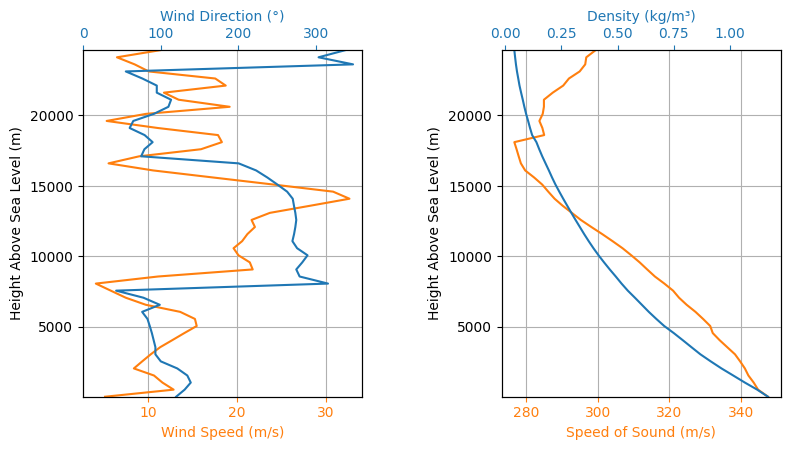


Gravity Details

Acceleration of gravity at surface level:    9.7803 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5379 m/s²


Launch Site Details

Launch Date: 2024-10-08 12:00:00 UTC
Launch Site Latitude: 39.12368°
Launch Site Longitude: -8.03333°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 1013.25 hPa
Surface Temperature: 288.15 K
Surface Air Density: 1.225 kg/m³
Surface Speed of Sound: 340.29 m/s


Earth Model Details

Earth Radius at Launch site: 6378.14 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



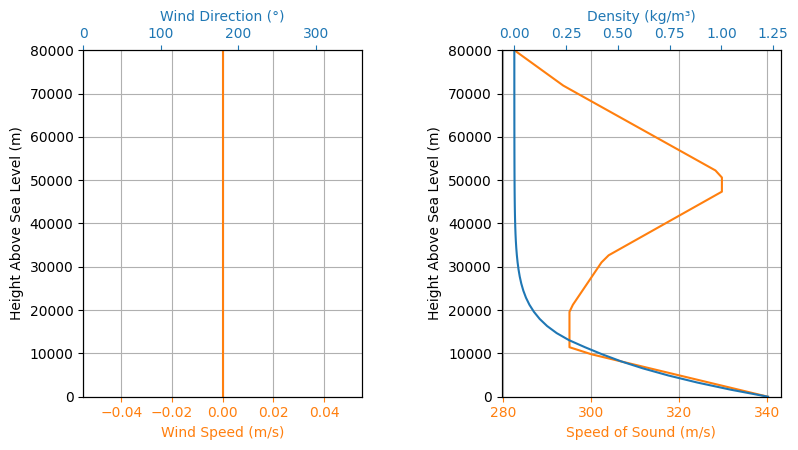

In [ ]:
#Ponte de Sor: 39.12368, -8.03333
#EUROC: 09.-15.10.2024


#Environment based on Forecast data
envForecast = Environment(latitude = 39.12368, longitude = -8.03333, elevation = 0)
envForecast.set_date(
    (2024, 10, 8, 12, 00, 00) #yyyy, mm, dd, hh, mm, ss
)

URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0200&TO=0200&STNM=82599"

envForecast.set_atmospheric_model(type="wyoming_sounding", file=URL)
# backups, if this one fails:
#envForecast.set_atmospheric_model(type = "Forecast", file = "RAP")
#envForecast.set_atmospheric_model(type="Forecast", file="GFS")
envForecast.info()



#Environment based on standard values
envNormal = Environment()
envNormal.set_location(latitude = 39.12368, longitude = -8.03333)
envNormal.set_elevation(0.0)
envNormal.set_date((2024, 10, 8, 12, 00, 00))
envNormal.set_atmospheric_model(type = "standard_atmosphere")
envNormal.info()

## Simulation

### Load Data from Sheets

In this section all important data is fetched from a csv

In [ ]:
# constant values
# PI
pi = math.pi

# temperature Lox & Ethanol
T_ethanol = 298.15 #K  (=25°C)
T_lox = 73.15 #K

# pressure LOX & Ethanol
p_ethanol = 3000000 #Pa
p_lox = 3000000 #Pa


# data from sheets
df = load_datasheet()

# rocket
rocket_length = find_float_in_sheets("total length [mm]", None, 1) /1000 #m
rocket_diameter = find_float_in_sheets("rocket diameter", None, 0, 1) /1000 #m
total_mass = find_float_in_sheets("total mass [g]", None, 1) /1000 #kg
rocket_thickness = find_float_in_sheets("rocket thickness", None, 0, 1) /1000 #m
nozzle_radius = find_float_in_sheets("nozzle diameter", None, 0, 1) /1000/2 #m
nozzle_position = find_float_in_sheets("nozzle position", None, 0, 1) /1000 #m

# inertia
inertia_x_y = find_float_in_sheets("total moment of inertia (lxly)",None, 1,0) #kg/m^2
inertia_z = find_float_in_sheets("total moment of inertia (lz)",None, 1,0) #kg/m^2

CG = find_float_in_sheets("CG [m]",None, 1,0) #m


# massflow Ethanol
mdot_ethanol = find_float_in_sheets("ethanol", "massflows") #kg/s
# massflow LOX
mdot_lox = find_float_in_sheets("lox", "massflows") #kg/s
# massflow Pressurant
mdot_pressurant = find_float_in_sheets("pressurant", "massflows") #kg/s
# Overfill
overfill_percentage = find_float_in_sheets("overfill percentage", None, 0,1) #%

# burn time
t_burn = find_float_in_sheets("burn time", None, 0, 1) #s


# Tanks

# OuterDiameter
OD_ethanol_tank = find_float_in_sheets("ethanol", "tank outer diameter")  /1000 #m
OD_lox_tank = find_float_in_sheets("lox", "tank outer diameter")  /1000 #m
OD_pressurant_tank = find_float_in_sheets("pressurant", "tank outer diameter")  /1000 #m

# Thickness
Th_ethanol_tank = find_float_in_sheets("ethanol", "thickness") /1000 #m
Th_lox_tank = find_float_in_sheets("lox", "thickness") /1000 #m
Th_pressurant_tank = find_float_in_sheets("pressurant", "thickness") /1000 #m

# height
h_ethanol_tank = find_length("s9") /1000 #m
h_lox_tank = find_length("s5") /1000 #m
h_pressurant_tank = find_length("ox pressurant tank") /1000 #m

<total length [mm]> :  3702.5
<rocket diameter> :  132.8
<total mass [g]> :  15003.12571
<rocket thickness> :  1.4
<nozzle diameter> :  75
<nozzle position> :  -40
<total moment of inertia (lxly)> :  20.9409
<total moment of inertia (lz)> :  0.0239
<CG [m]> :  1.536701819
<ethanol> | <massflows> :  0.6
<lox> | <massflows> :  0.597
<pressurant> | <massflows> :  0.03
<overfill percentage> :  10
<burn time> :  3.6
<ethanol> | <tank outer diameter> :  115
<lox> | <tank outer diameter> :  115
<pressurant> | <tank outer diameter> :  93
<ethanol> | <thickness> :  2.5
<lox> | <thickness> :  2.5
<pressurant> | <thickness> :  2
<s9> | <section length (mm)> :  559
<s5> | <section length (mm)> :  559
<ox pressurant tank> | <section length (mm)> :  242


### Pressurant Tanks

Section for the pressurant tanks. The two pressurant tanks are identical, so they only have to be defined once

In [ ]:
#Pressurant variables
#Inner Diameter
ID_pressurant_tank = OD_pressurant_tank - Th_pressurant_tank
#Density
rho_pressurant = CP.PropsSI("D","T",298.15,"P|gas",3e7,"N2") #kg/m^3
#mass
m_pressurant = mdot_pressurant * (t_burn) #kg

pressurant_gas = Fluid(name = "N2", density = rho_pressurant)
pressurant_tank_shape = CylindricalTank(radius = ID_pressurant_tank / 2, height = h_pressurant_tank, spherical_caps = True)

pressurant_tank = MassFlowRateBasedTank(
    name = "pressurant tank",
    geometry = pressurant_tank_shape,
    flux_time = t_burn, #s
    initial_liquid_mass = 0, #kg
    initial_gas_mass = m_pressurant + (overfill_percentage/100 * t_burn * mdot_pressurant), #kg
    liquid_mass_flow_rate_in = 0, #kg/s
    liquid_mass_flow_rate_out = 0, #kg/s
    gas_mass_flow_rate_in = 0, #kg/s
    gas_mass_flow_rate_out = lambda t: mdot_pressurant, #ks/s
    liquid = Fluid(name = "liquid", density = 0.0001), #ignore
    gas = pressurant_gas,
)

### Prop & LOX Tank / Engine



<s5> | <CG of section from bottom [mm]> :  2087
<s9> | <CG of section from bottom [mm]> :  1062
<s3> | <CG of section from bottom [mm]> :  2721.5
<s7> | <CG of section from bottom [mm]> :  1686.5
Nozzle Details
Nozzle Radius: 0.0375 m

Motor Details
Total Burning Time: 3.6 s
Total Propellant Mass: 4.978 kg
Average Propellant Exhaust Velocity: 1616.732 m/s
Average Thrust: 1935.228 N
Maximum Thrust: 1954.2229 N at 0.0 s after ignition.
Total Impulse: 6966.820 Ns



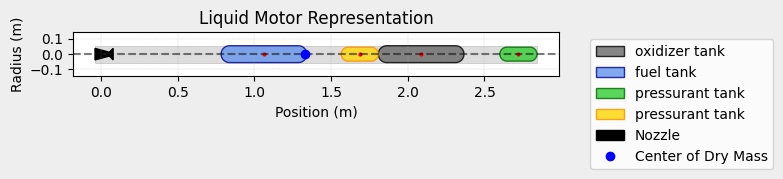

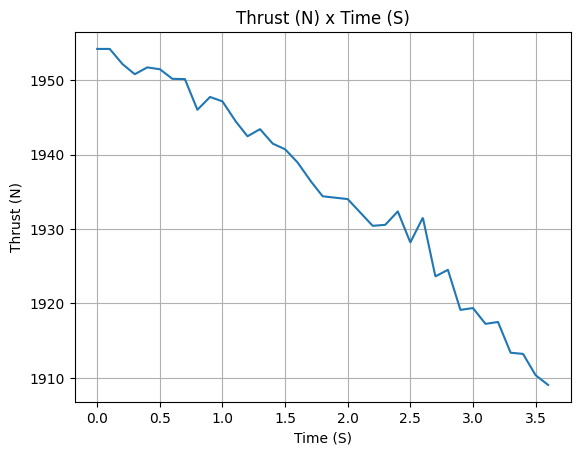

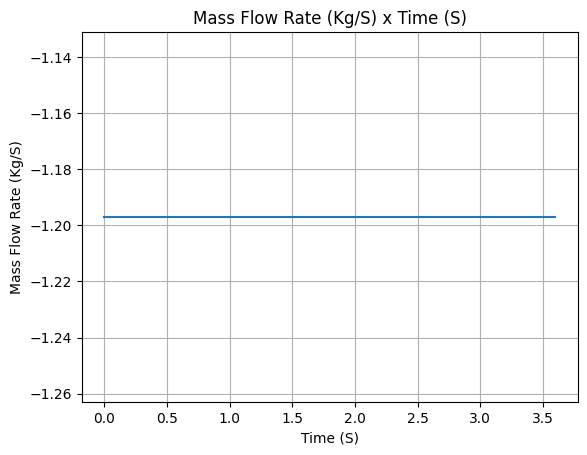

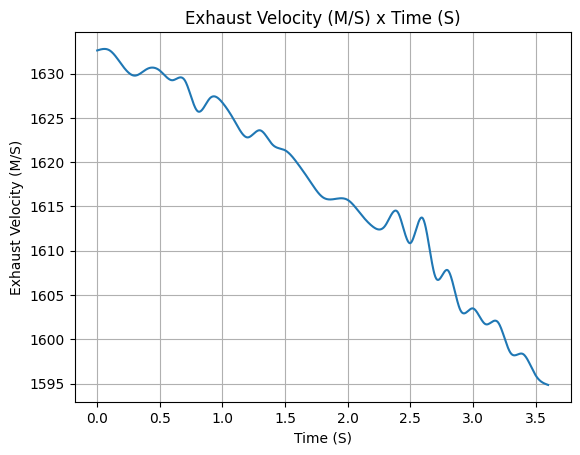

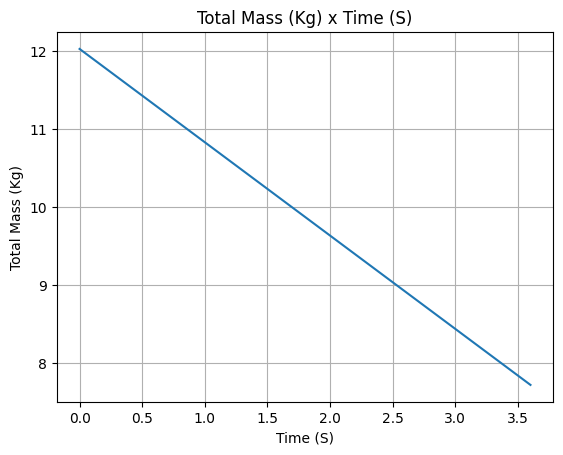

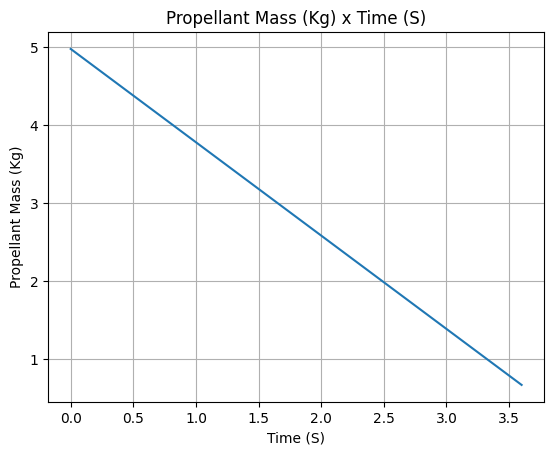

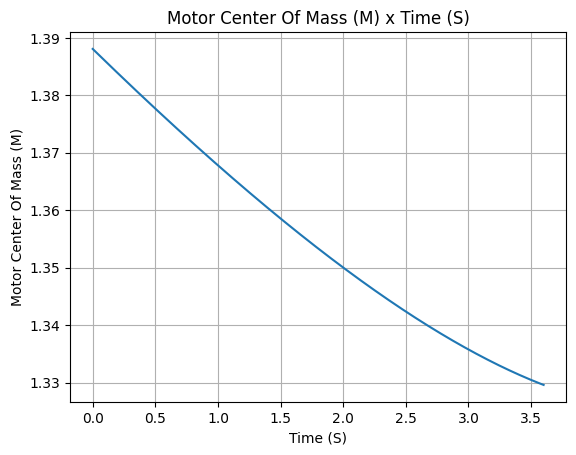

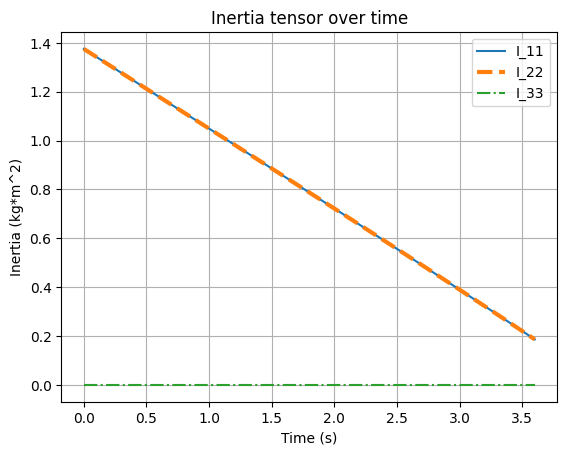

In [ ]:
df = load_datasheet()
# inner diameter
ID_ethanol_tank = OD_ethanol_tank - (2 * Th_ethanol_tank) #m
ID_lox_tank = OD_lox_tank - (2 * Th_lox_tank) #m

# Propellants
# mass
m_ethanol = mdot_ethanol * (t_burn) #kg
m_lox = mdot_lox * (t_burn) #kg

# define density
rho_ethanol = CP.PropsSI("D", "T", T_ethanol, "P", p_ethanol, "ethanol") #kg/m^3
rho_lox = CP.PropsSI("D", "T|liquid", T_lox, "P", p_lox, "oxygen") #kg/m^3

#Volume
v_ethanol = m_ethanol/rho_ethanol#V=m/d
v_lox = m_lox/rho_lox

# define fluids
ethanol = Fluid(name = "ethanol", density = rho_ethanol)
lox = Fluid(name = "LOX", density = rho_lox)

# define tanks geometry
ethanol_tank_shape = CylindricalTank(radius = ID_ethanol_tank / 2, height = h_ethanol_tank, spherical_caps = True)
lox_tank_shape = CylindricalTank(radius = ID_lox_tank / 2, height = h_lox_tank, spherical_caps = True)

# define tanks
ethanol_tank = MassFlowRateBasedTank(
    name = "fuel tank",
    geometry = ethanol_tank_shape,
    flux_time = t_burn, #s
    initial_liquid_mass = m_ethanol + (overfill_percentage/100 * t_burn * mdot_ethanol), #kg
    initial_gas_mass = 0, #kg
    liquid_mass_flow_rate_in = 0, #kg/s
    liquid_mass_flow_rate_out = lambda t: mdot_ethanol, #kg/s
    gas_mass_flow_rate_in = lambda t: mdot_pressurant, #kg/s
    gas_mass_flow_rate_out = 0, #kg/s
    liquid = ethanol,
    gas = pressurant_gas,
)

lox_tank = MassFlowRateBasedTank(
    name = "oxidizer tank",
    geometry = lox_tank_shape,
    flux_time = t_burn, #s
    initial_liquid_mass = m_lox + (overfill_percentage/100 * t_burn * mdot_lox), #kg
    initial_gas_mass = 0, #kg
    liquid_mass_flow_rate_in = 0, #kg/s
    liquid_mass_flow_rate_out = lambda t: mdot_lox, #kg/s
    gas_mass_flow_rate_in = lambda t: mdot_pressurant, #kg/s
    gas_mass_flow_rate_out = 0, #kg/s
    liquid = lox,
    gas = pressurant_gas,
)


engine = LiquidMotor(
    dry_mass = 7.051, #kg
    dry_inertia = (0, 0, 0), #kg*m^2 #no influence if mass = 0
    center_of_dry_mass_position = 1.327, #m   #no influence if mass=0

    nozzle_radius = nozzle_radius, #m
    nozzle_position = nozzle_position, #m

    thrust_source = "thrust_curve.csv", #N
    burn_time = t_burn, #s
    coordinate_system_orientation = "nozzle_to_combustion_chamber"
)

engine.add_tank(tank = lox_tank, position = find_float_in_sheets("s5", "CG of section from bottom [mm]") /1000)
engine.add_tank(tank = ethanol_tank, position = find_float_in_sheets("s9", "CG of section from bottom [mm]") /1000)
engine.add_tank(tank = pressurant_tank, position = find_float_in_sheets("s3", "CG of section from bottom [mm]") /1000)
engine.add_tank(tank = pressurant_tank, position = find_float_in_sheets("s7", "CG of section from bottom [mm]") /1000)

engine.all_info()

### Rocket

<nosecone> | <section length (mm)> :  650
<version> :  Biconvex V2


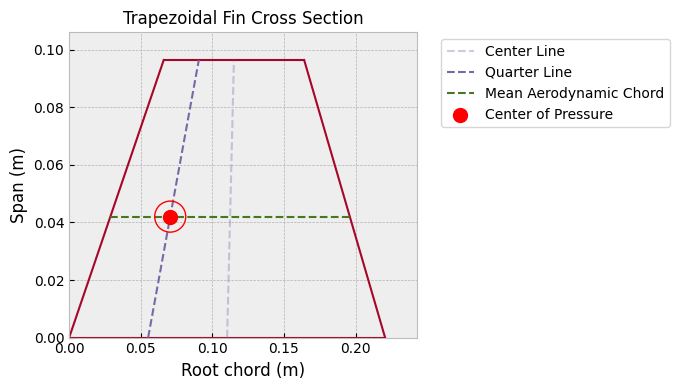

<railbuttons distance> :  -1200


In [ ]:
df = load_datasheet()
nose_cone = NoseCone(
    length = (find_length("nosecone") - 100) /1000, #m
    base_radius = rocket_diameter /2, #m
    kind = "lv haack"
)

tailcone_cylindrical = 0.034 #m
tailcone_length = 0.245 #m
tailcone_bottom_radius = 0.02425 #m

tail = Tail(
    top_radius = rocket_diameter /2, #m
    bottom_radius = tailcone_bottom_radius, #m
    length = tailcone_length, #m
    rocket_radius = rocket_diameter/2 #m
)

fin_name = find_val_in_sheets("version", None, 1)
fin_position = 0.224 #m
fin_root_chord = 0.2206 #m
fin_tip_chord = 0.0981 #m
fin_span = 0.0964 #m
fin_sweep_length = 0.066 #m
#fin_cant_angle = find_float_in_sheets(fin_name, "cant angle") #deg #not used
#fin_sweep_angle = find_float_in_sheets(fin_name, "sweep angle") #deg #not used


fin_set = TrapezoidalFins(
    n = 4,
    root_chord = fin_root_chord, #m
    tip_chord = fin_tip_chord, #m
    span = fin_span, #m
    sweep_length = fin_sweep_length, #m
    #cant_angle = fin_cant_angle, #deg
    #sweep_angle = fin_sweep_angle, #deg
    name = fin_name,
    rocket_radius = rocket_diameter/2 #m
  )
fin_set.draw()

railbuttons_distance = find_float_in_sheets("railbuttons distance", None, 0, 1) /1000 #m
upper_railbutton = RailButtons(
    angular_position = 45, #deg
    buttons_distance = railbuttons_distance, #m
    rocket_radius = rocket_diameter/2 #m
)
parachutes = {}

parachutes[0] = Parachute(
    name = "main",
    cd_s = 6.9115,
    trigger = 450, #m
    sampling_rate = 255, #hz
    lag = 3, #s
    noise = (0, 8.3, 0.5), #(pa, pa, pa)
)

parachutes[1] = Parachute(
    name = "drogue",
    cd_s = 0.336875,
    trigger = "apogee",  # ejection at apogee
    sampling_rate = 255, #hz
    lag = 1, #s
    noise = (0, 8.3, 0.5) #(pa, pa, pa)
)

### Hedy

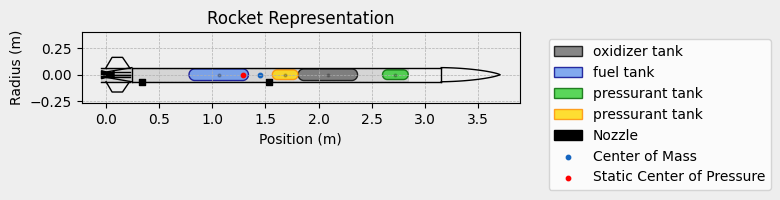


Inertia Details

Rocket Mass: 7.952 kg (without motor)
Rocket Dry Mass: 15.003 kg (with unloaded motor)
Rocket Loaded Mass: 19.981 kg
Rocket Inertia (with unloaded motor) 11: 21.105 kg*m2
Rocket Inertia (with unloaded motor) 22: 21.105 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.024 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0664 m
Rocket Frontal Area: 0.013851 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.099 m
Rocket Center of Dry Mass - Nozzle Exit: 1.478 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.036 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.009 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Tail Lift Coefficient Derivative: -1.733/rad
Biconvex V2 Lift Coefficient Derivative: 5.472/rad

Center

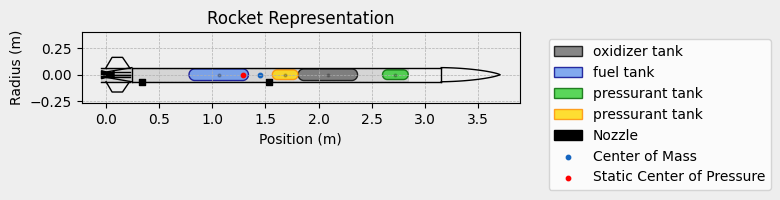


Mass Plots
----------------------------------------


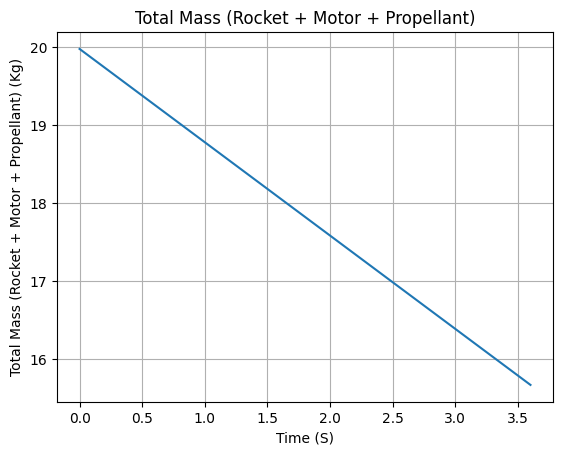

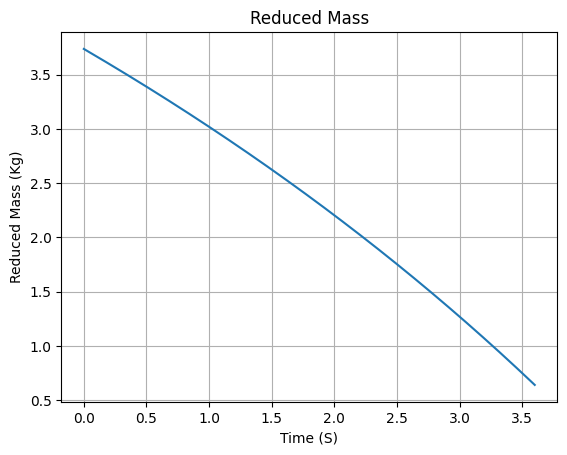


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


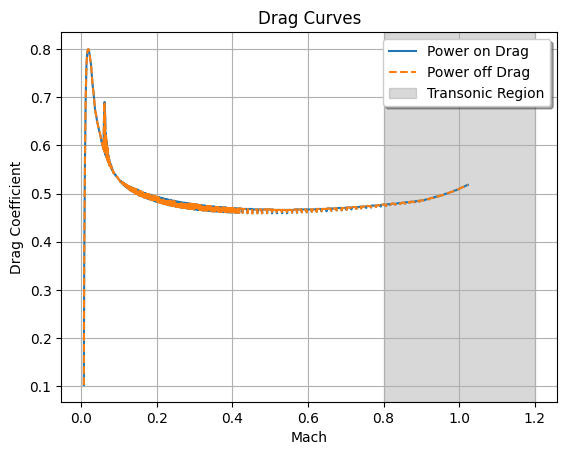


Stability Plots
--------------------


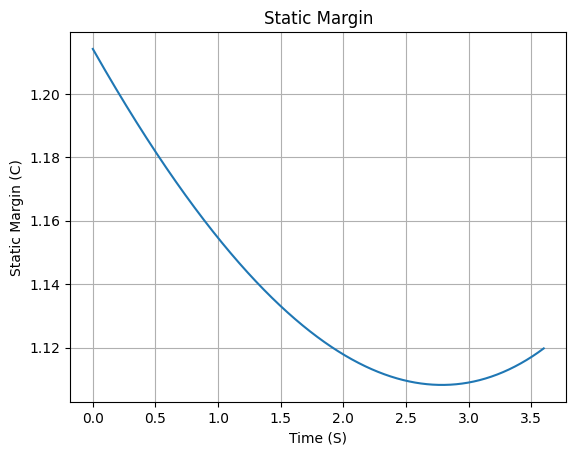

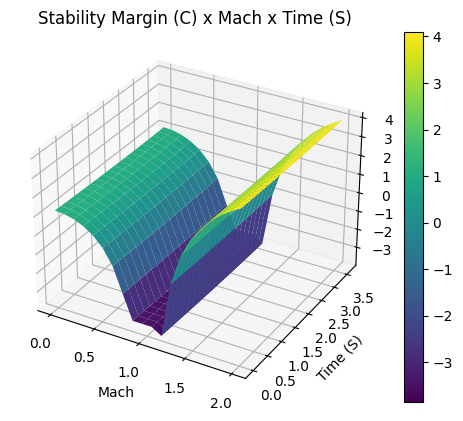


Thrust-to-Weight Plot
----------------------------------------


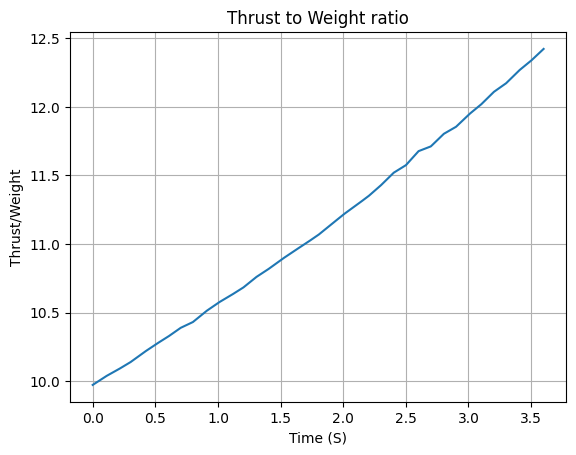

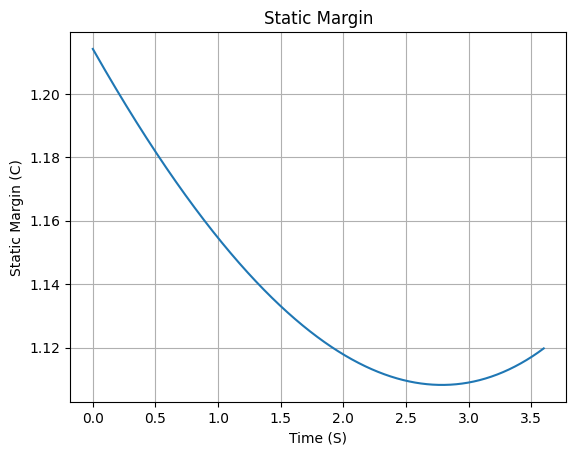

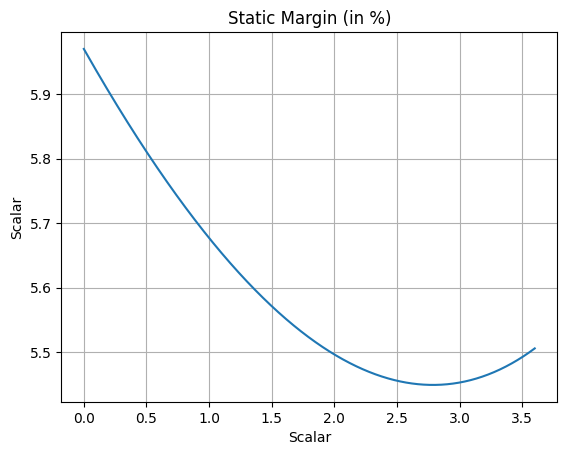

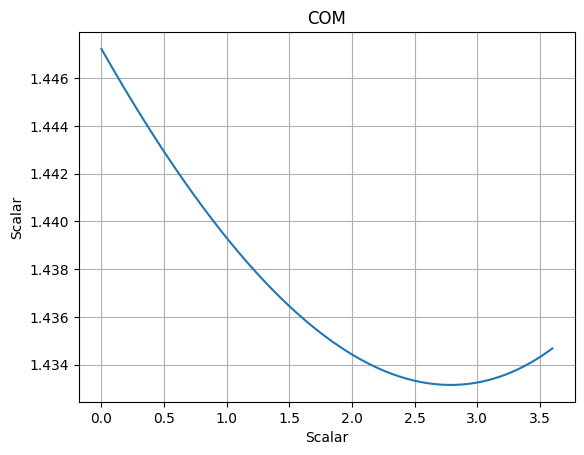

In [ ]:
hedy = Rocket(
    radius = rocket_diameter /2, #m
    mass = total_mass-engine.dry_mass, # m
    inertia = (inertia_x_y, inertia_x_y, inertia_z), #kg * m^2
    power_off_drag = "LV-100-550_drag_curve_OpenRocket.csv",
    power_on_drag = "LV-100-550_drag_curve_OpenRocket.csv",
    center_of_mass_without_motor = CG, #m
    coordinate_system_orientation = "tail_to_nose"
)
hedy.add_motor(engine, position = 0)

hedy.add_surfaces(surfaces=[nose_cone, fin_set, tail, upper_railbutton], positions=[rocket_length, fin_position, tailcone_length, CG])

hedy.parachutes = list(parachutes.values())

hedy.draw()
hedy.all_info()
hedy.plots.static_margin()

f = Function(hedy.static_margin * rocket_diameter * 1000 * rocket_length / 100, title = "Static Margin (in %)")
f.plot()

f2 = Function(hedy.center_of_mass, title = "COM")
f2.plot()

### Flight

In [ ]:
test_flight = Flight(
          environment = envForecast,
          rocket = hedy,
          rail_length = 11, #m
          inclination = 85, #°
          heading = 90, #°
          name = "normalized environment"
  )
#test_flight.prints.initial_conditions()
#test_flight.prints.out_of_rail_conditions()
test_flight.prints.apogee_conditions()
test_flight.prints.maximum_values()
#test_flight.plots.trajectory_3d()
#test_flight.stability_margin.plot()
test_flight.prints.impact_conditions()
#test_flight.all_info()



Apogee State

Apogee Time: 25.017 s
Apogee Altitude: 3344.925 m (ASL) | 3295.925 m (AGL)
Apogee Freestream Speed: 42.528 m/s
Apogee X position: 967.080 m
Apogee Y position: -302.385 m
Apogee latitude: 39.1209595°
Apogee longitude: -8.0221173°

Maximum Values

Maximum Speed: 327.492 m/s at 3.60 s
Maximum Mach Number: 0.959 Mach at 3.60 s
Maximum Reynolds Number: 2.674e+06 at 3.60 s
Maximum Dynamic Pressure: 6.063e+04 Pa at 3.60 s
Maximum Acceleration During Motor Burn: 93.394 m/s² at 1.56 s
Maximum Gs During Motor Burn: 9.524 g at 1.56 s
Maximum Acceleration After Motor Burn: 10.110 m/s² at 21.26 s
Maximum Gs After Motor Burn: 1.031 Gs at 21.26 s
Maximum Stability Margin: 4.875 c at 0.00 s
Maximum Upper Rail Button Normal Force: 14.672 N
Maximum Upper Rail Button Shear Force: 3.627 N
Maximum Lower Rail Button Normal Force: 35.168 N
Maximum Lower Rail Button Shear Force: 8.595 N

Impact Conditions

Time of impact: 186.195 s
X impact: -106.404 m
Y impact: 444.189 m
Altitude impact: 49.00

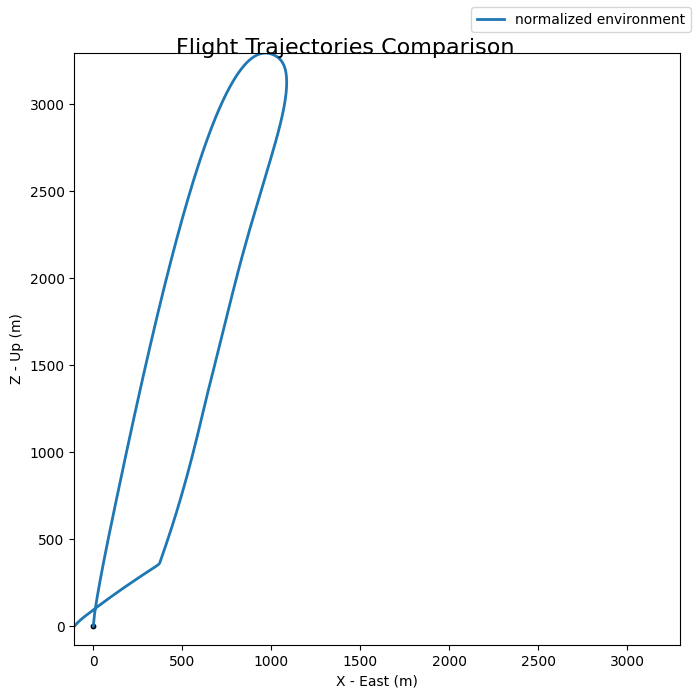

In [ ]:
from rocketpy.plots.compare import CompareFlights
test_flights = []
test_flights.append(test_flight)
#for i in range(3):
  #test_flights[i].prints.initial_conditions()
  #test_flights[i].prints.out_of_rail_conditions()
  #test_flights[i].prints.apogee_conditions()
  #test_flights[i].prints.maximum_values()
  #test_flights[i].plots.trajectory_3d()

comparison = CompareFlights(test_flights)
comparison.trajectories_2d(legend = True, plane = "xz")

#stochastic

Reporting the attributes of the `StochasticEnvironment` object:

Constant Attributes:
	datum                    SIRGAS2000
	elevation                49.0
	gravity                  Function from R1 to R1 : (height (m)) → (gravity (m/s²))
	latitude                 39.12368
	longitude                -8.03333
	timezone                 UTC

Stochastic Attributes:
	wind_velocity_x_factor   1.00000 ± 0.00000 (normal)
	wind_velocity_y_factor   1.00000 ± 0.00000 (normal)
Reporting the attributes of the `StochasticRocket` object:

Constant Attributes:
	I_11_without_motor              20.9409
	I_12_without_motor              0
	I_13_without_motor              0
	I_22_without_motor              20.9409
	I_23_without_motor              0
	I_33_without_motor              0.0239
	center_of_mass_without_motor    1.536701819
	coordinate_system_orientation   tail_to_nose
	mass                            15.00312571
	power_off_drag                  Function from R1 to R1 : (Mach Number) → (Drag Coefficie

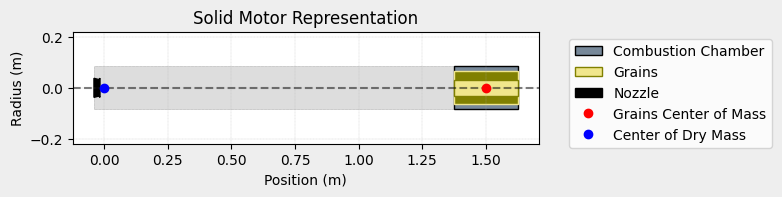

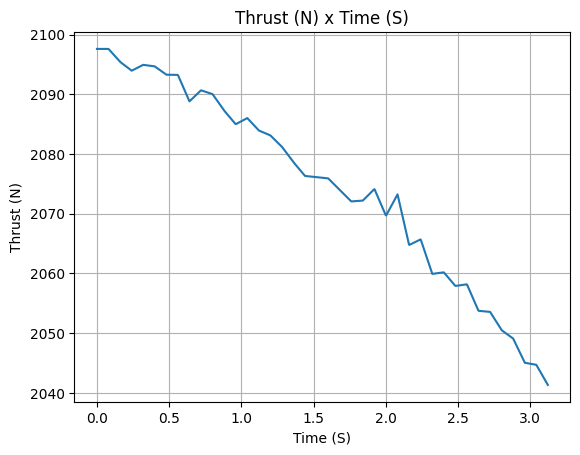

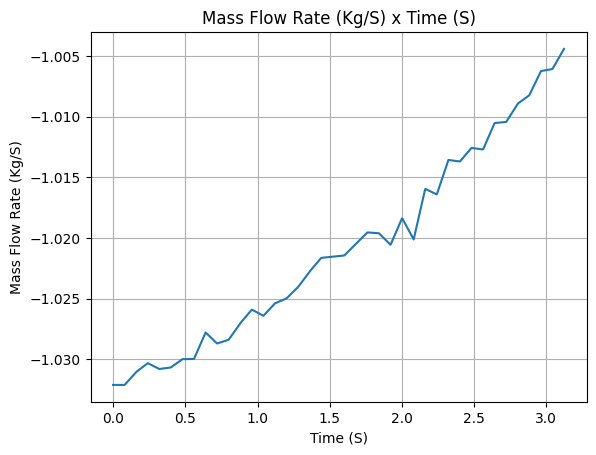

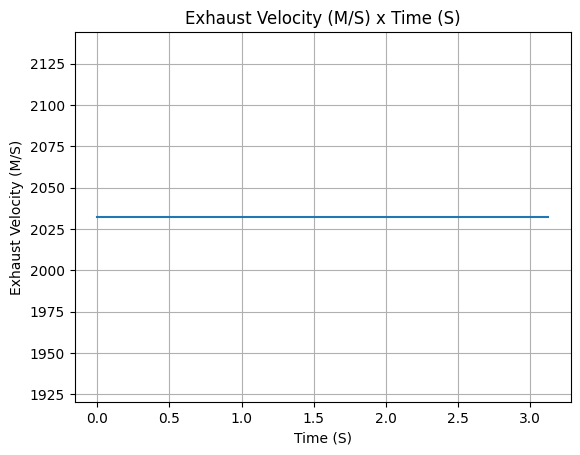

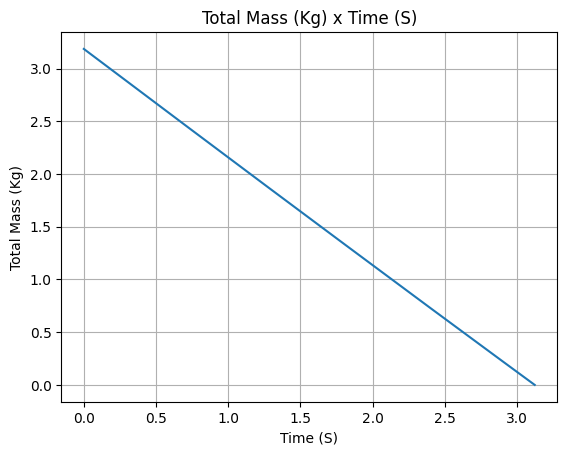

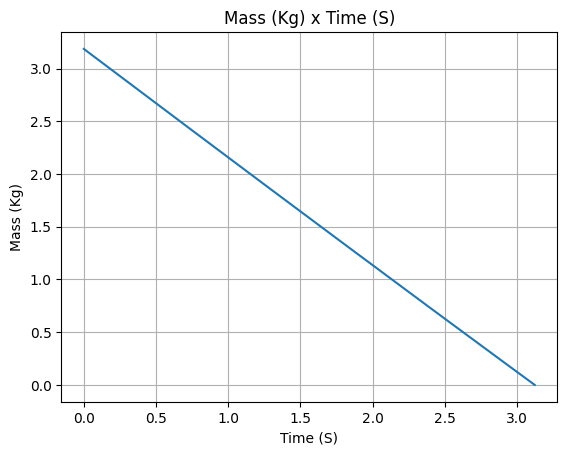

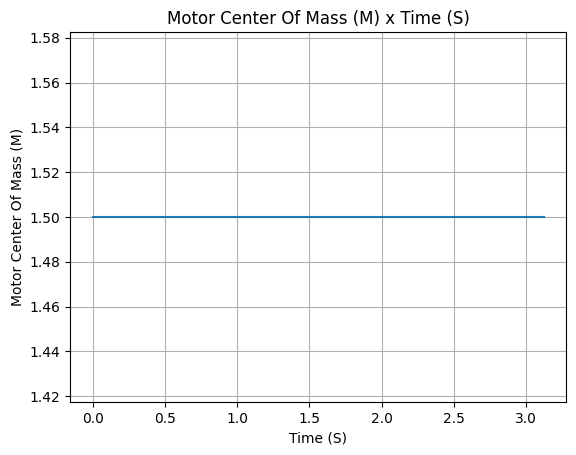

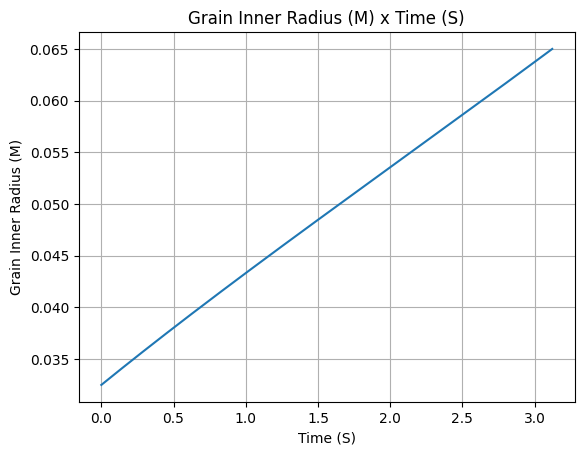

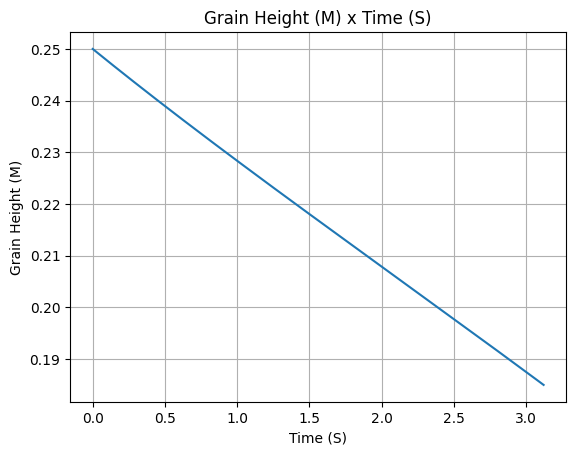

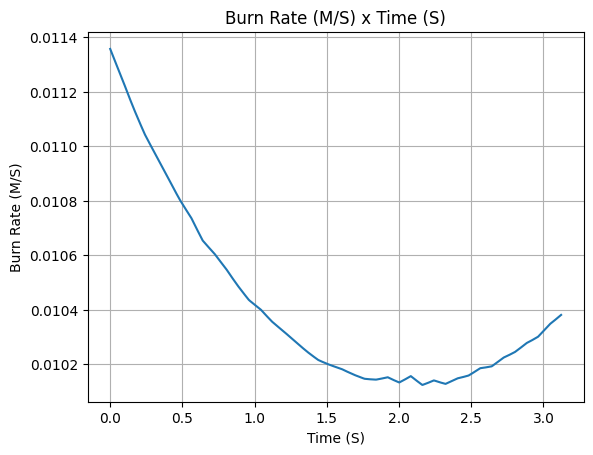

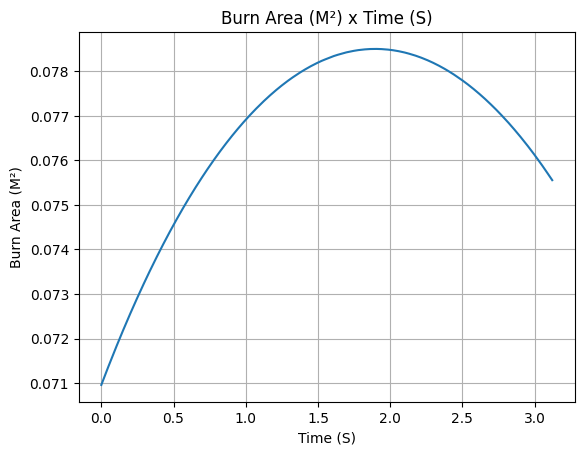

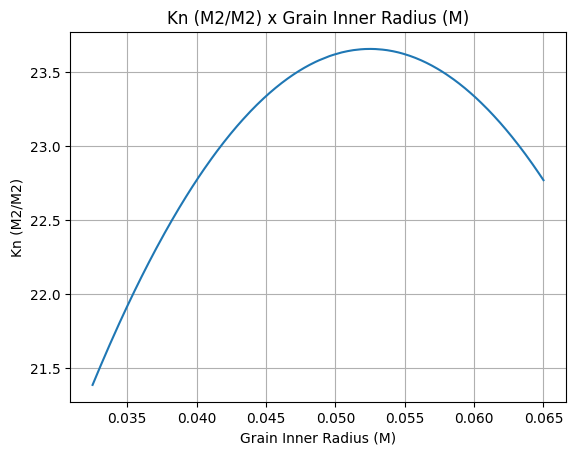

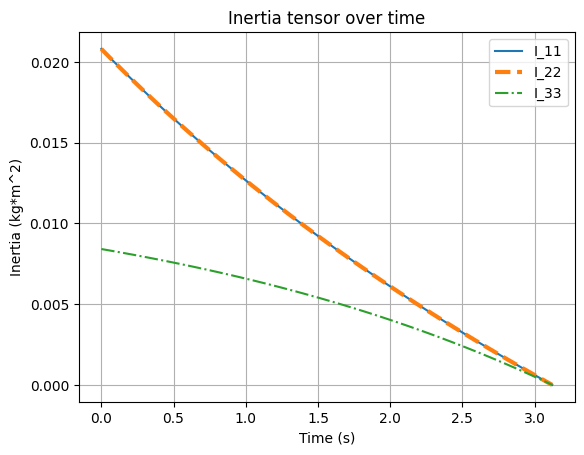


Inertia Details

Rocket Mass: 15.003 kg (without motor)
Rocket Dry Mass: 15.003 kg (with unloaded motor)
Rocket Loaded Mass: 18.190 kg
Rocket Inertia (with unloaded motor) 11: 20.941 kg*m2
Rocket Inertia (with unloaded motor) 22: 20.941 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.024 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0664 m
Rocket Frontal Area: 0.013851 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.577 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.037 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.006 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Biconvex V2 Lift Coefficient Derivative: 9.008/rad
Tail Lift Coefficient Derivative: -0.911/rad

Cente

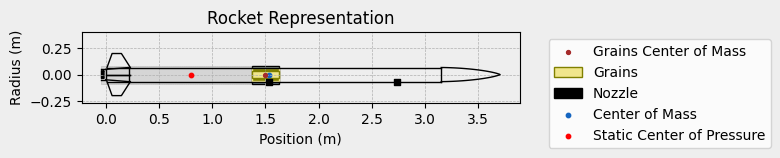


Mass Plots
----------------------------------------


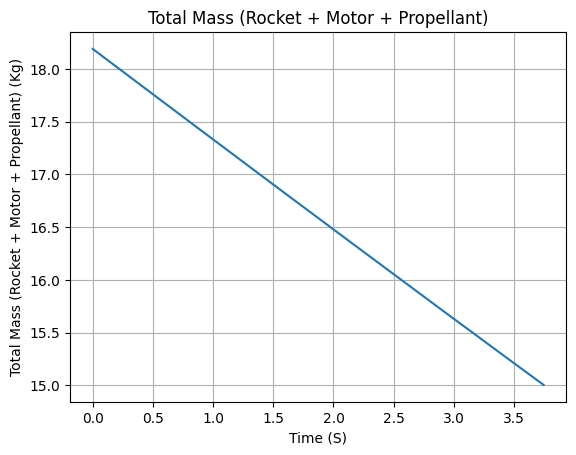

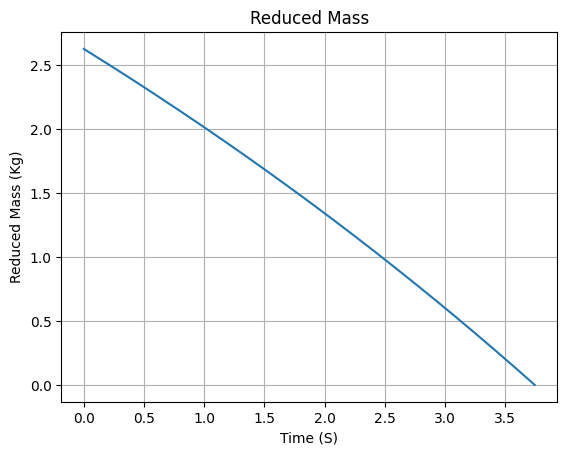


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


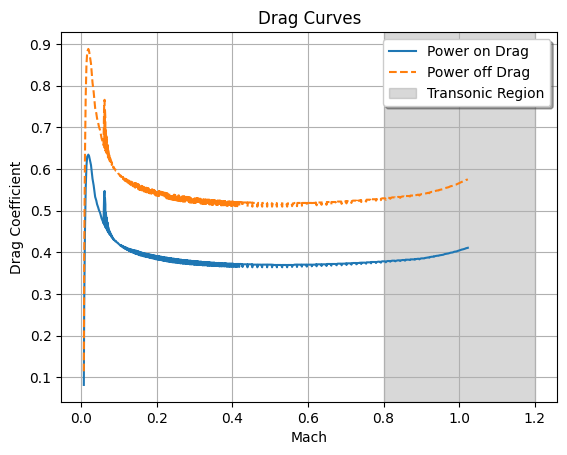


Stability Plots
--------------------


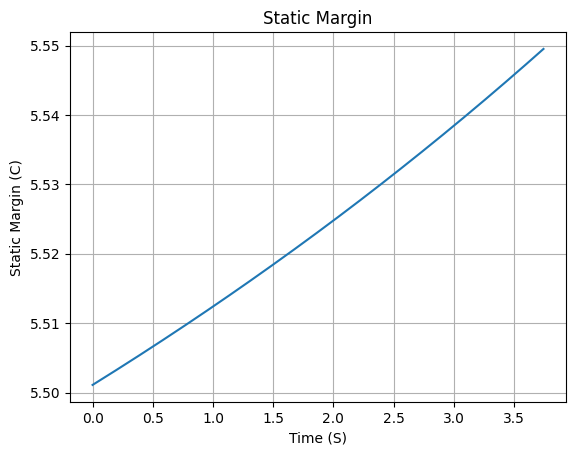

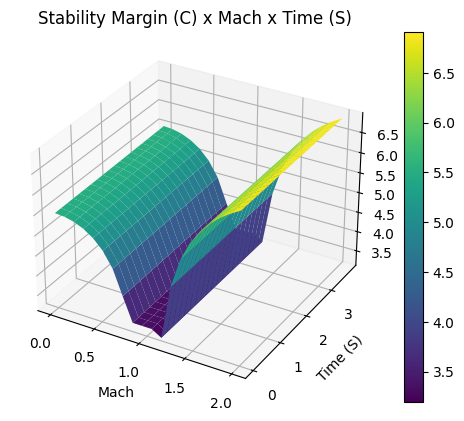


Thrust-to-Weight Plot
----------------------------------------


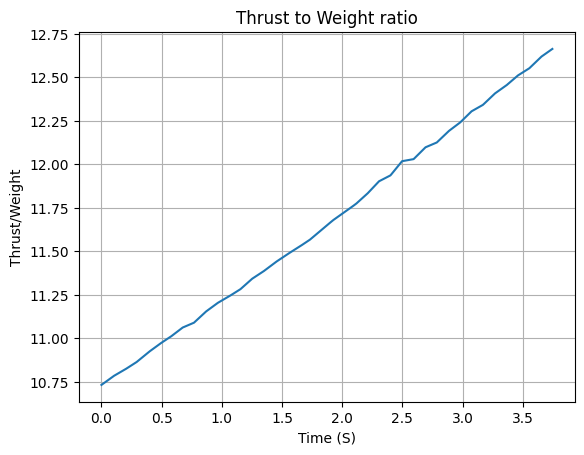

/usr/local/lib/python3.10/dist-packages/rocketpy/simulation/monte_carlo.py:112: UserWarning: This class is still under testing and some attributes may be changed in next versions
  warnings.warn(


The following input file was imported: monte_carlo_class_example.inputs.txt
A total of 50 simulations results were loaded from the following output file: monte_carlo_class_example.outputs.txt

The following error file was imported: monte_carlo_class_example.errors.txt
Completed 50 iterations. Total CPU time: 107.8 s. Total wall time: 108.9 s
Saving results.  
Results saved to monte_carlo_class_example.outputs.txt
50
Monte Carlo Simulation by RocketPy
Data Source:  monte_carlo_class_example
Number of simulations:  50
Results: 

                Parameter            Mean       Std. Dev.
------------------------------------------------------------
              apogee_time          25.479           2.407
     lateral_surface_wind           4.453           0.783
          impact_velocity          -6.026           0.000
                  t_final         192.306          24.093
                 x_impact        -312.465         279.535
          max_mach_number           0.993           0.143


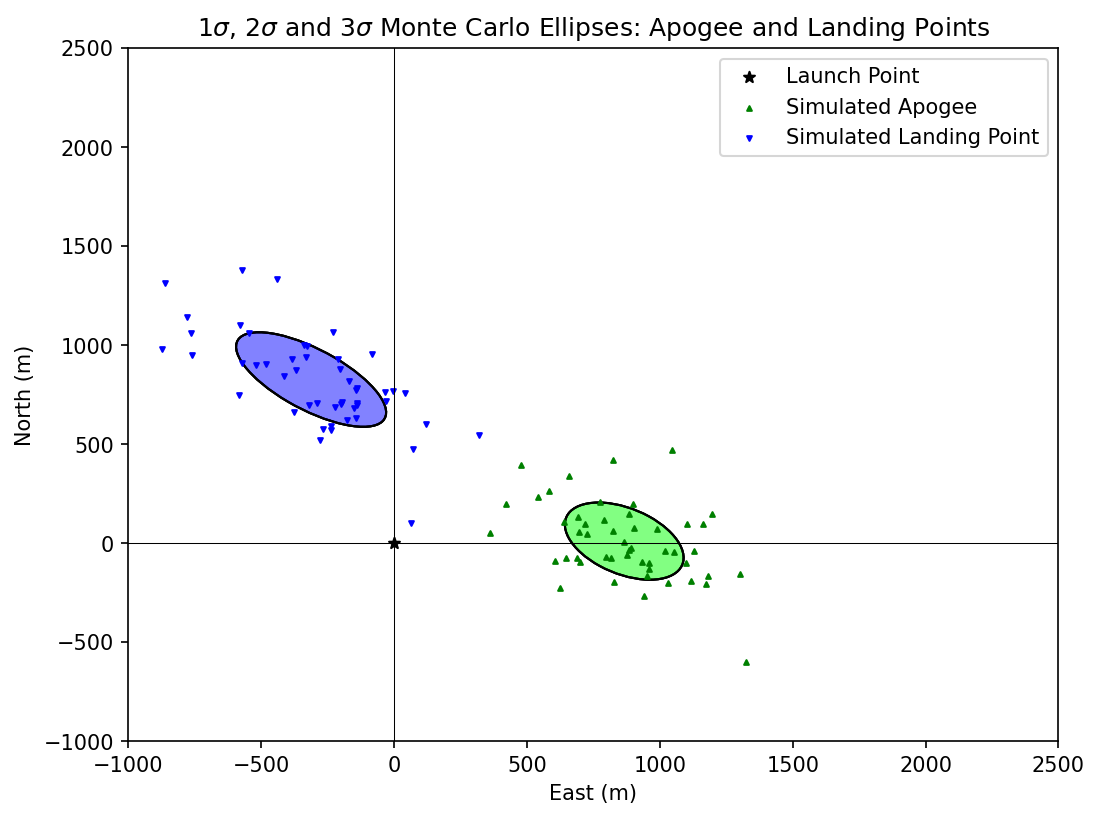

In [ ]:
df = load_datasheet()

stochastic_env = StochasticEnvironment(
    environment = envForecast,
    #ensemble_member=list(range(envForecast.num_ensemble_members)),
)

stochastic_env.visualize_attributes()

#wind_speed_at_1000m = []
#for i in range(5):
#    rnd_env = stochastic_env.create_object()
#    wind_speed_at_1000m.append(rnd_env.wind_velocity_x(1000))

#print(wind_speed_at_1000m)



stochastic_rocket = StochasticRocket(
    rocket = hedy,
    power_off_drag_factor = (1, 0.25, "normal"),
    power_on_drag_factor = (1, 0.25, "normal"),
)
stochastic_rocket.visualize_attributes()

stochastic_nose_cone = StochasticNoseCone(
    nosecone = nose_cone
)

stochastic_fin_set = StochasticTrapezoidalFins(
    trapezoidal_fins = fin_set,
    #span = (fin_span, 0.01, "normal")
)

stochastic_tail = StochasticTail(
    tail = tail
)

stochastic_rail_buttons = StochasticRailButtons(
    rail_buttons = upper_railbutton
)

stochastic_main = StochasticParachute(
    parachute = parachutes[0]
)

stochastic_drogue = StochasticParachute(
    parachute = parachutes[1]
)


motor = SolidMotor(
    thrust_source = "thrust_curve.csv",
    center_of_dry_mass_position = 0,
    dry_mass = 0,
    dry_inertia = [0, 0, 0],
    grains_center_of_mass_position = 1.5,
    grain_number = 1,
    grain_density = 1280.5726008902443,
    grain_outer_radius = 0.065,
    grain_initial_inner_radius = 0.0325,
    grain_initial_height = 0.25,
    grain_separation = 0,
    nozzle_radius = 0.0375,
    nozzle_position = -0.04,
    throat_radius = 0.0325,
    interpolation_method = 'linear',
    coordinate_system_orientation = 'nozzle_to_combustion_chamber',
)
#motor.all_info()

stochastic_motor = StochasticSolidMotor(
    solid_motor=motor,
    total_impulse = (6966.82, 1950*0.5, "normal"),
    burn_out_time = (3.6, 0.5, "normal")
)
motor = stochastic_motor.create_object()
motor.all_info()
#stochastic_motor.visualize_attributes()




stochastic_rocket.add_motor(stochastic_motor)
stochastic_rocket.add_nose(stochastic_nose_cone)
stochastic_rocket.add_trapezoidal_fins(stochastic_fin_set)
stochastic_rocket.add_tail(stochastic_tail)
stochastic_rocket.set_rail_buttons(stochastic_rail_buttons)
stochastic_rocket.add_parachute(stochastic_main)
stochastic_rocket.add_parachute(stochastic_drogue)

rocket = stochastic_rocket.create_object()
rocket.all_info()


#stochastic_rocket.visualize_attributes()


stochastic_flight = StochasticFlight(
    flight = test_flight,
    inclination = (85, 1),  # mean= 85, std=1
    heading = (53, 20),  # mean= 53, std=20
)
#stochastic_flight.visualize_attributes()



test_dispersion = MonteCarlo(
    filename="monte_carlo_class_example",
    environment=stochastic_env,
    rocket=stochastic_rocket,
    flight=stochastic_flight
)



test_dispersion.simulate(number_of_simulations = 50, append = False)



print(test_dispersion.num_of_loaded_sims)



test_dispersion.prints.all()


test_dispersion.plots.ellipses(xlim = (-1000, 2500), ylim = (-1000, 2500))
#test_dispersion.plots.all()

test_dispersion.export_ellipses_to_kml(
    filename = "monte_carlo_class_example.kml",
    origin_lat = envForecast.latitude,
    origin_lon = envForecast.longitude,
    type = "impact",
)

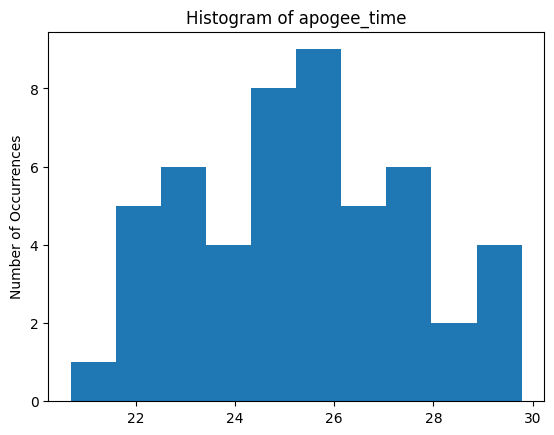

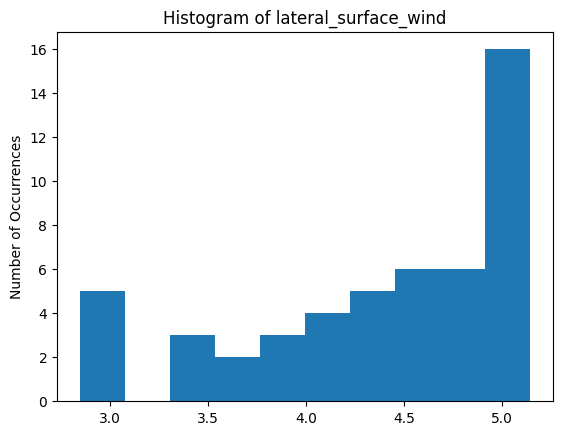

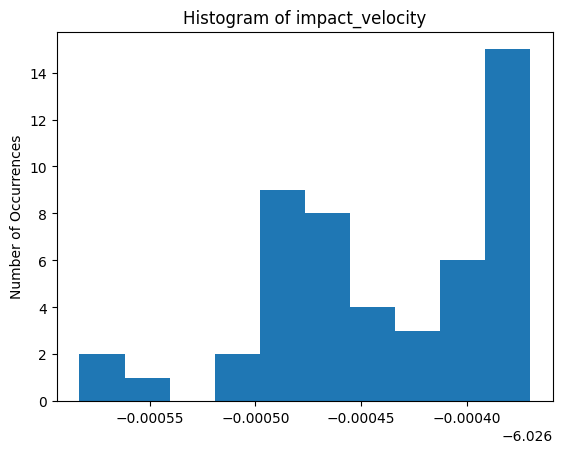

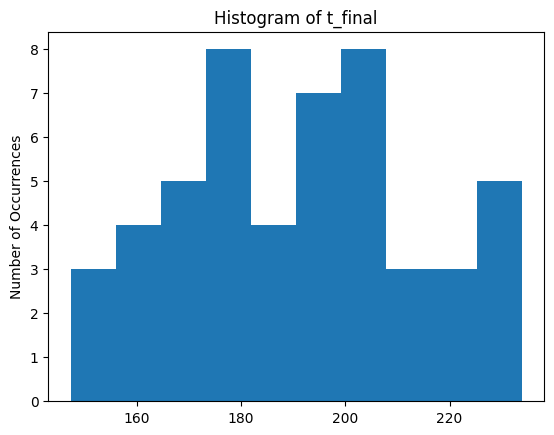

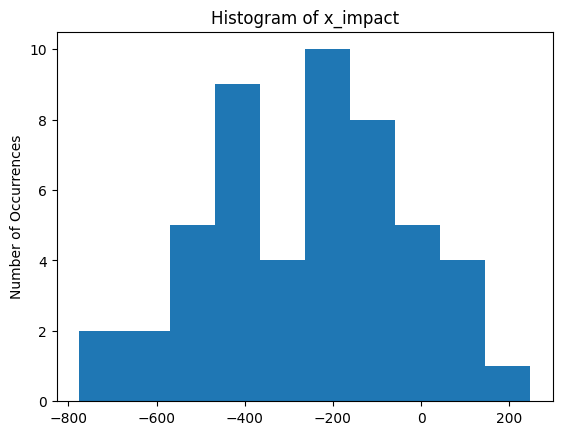

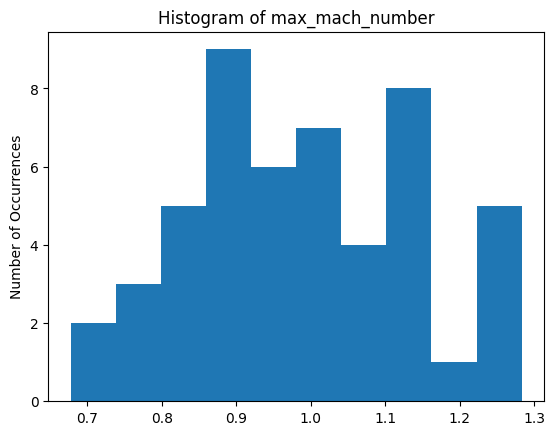

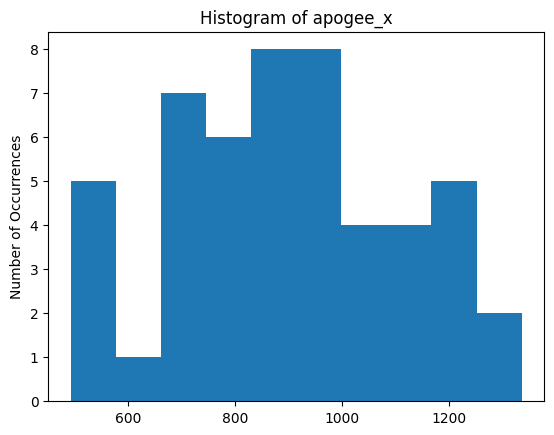

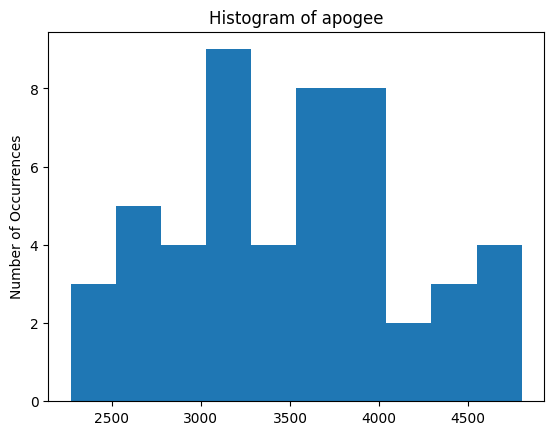

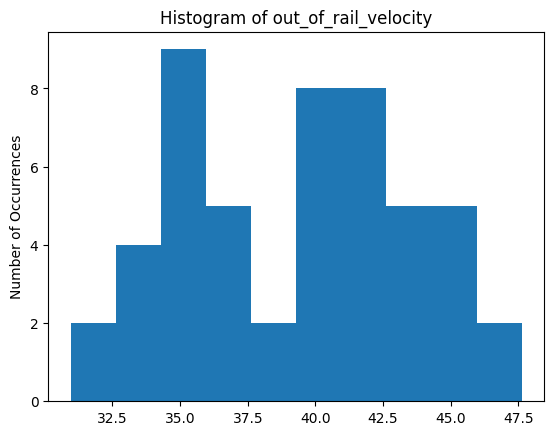

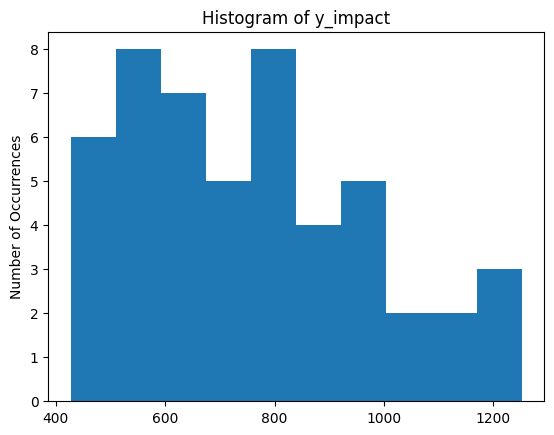

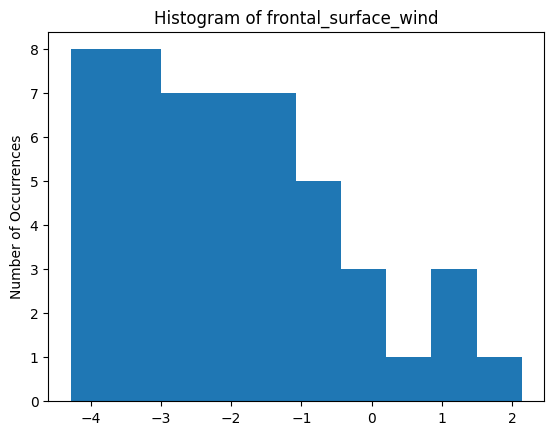

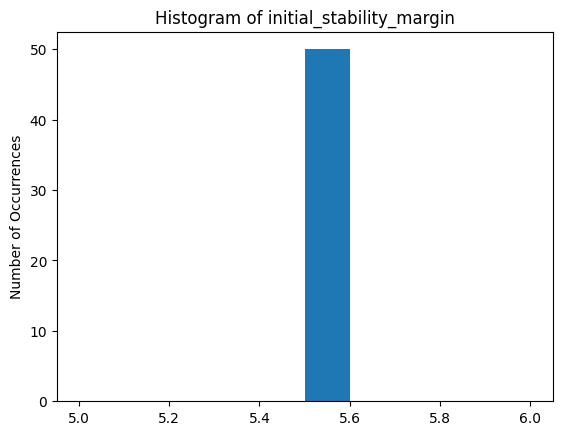

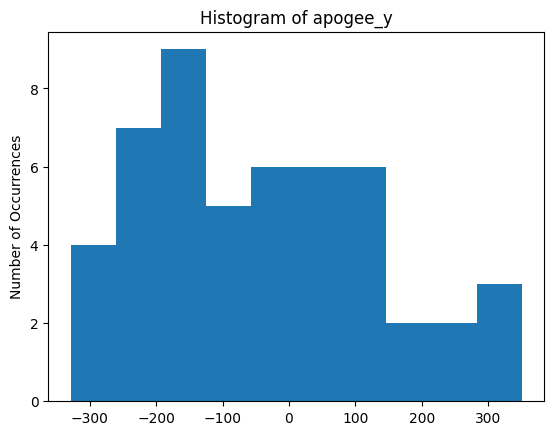

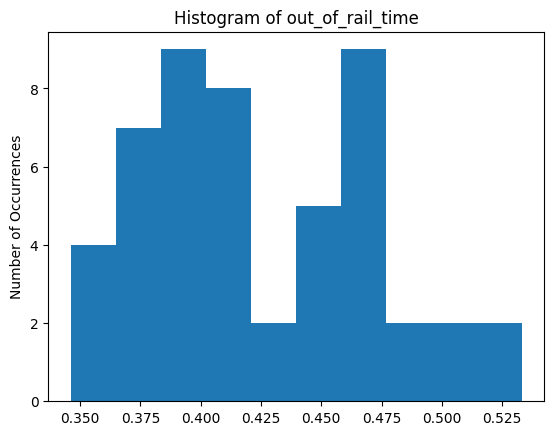

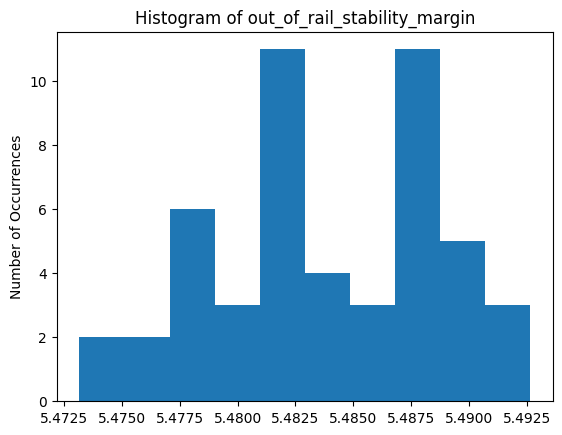

In [ ]:
test_dispersion.plots.all()